Welcome to JupyROOT 6.24/06


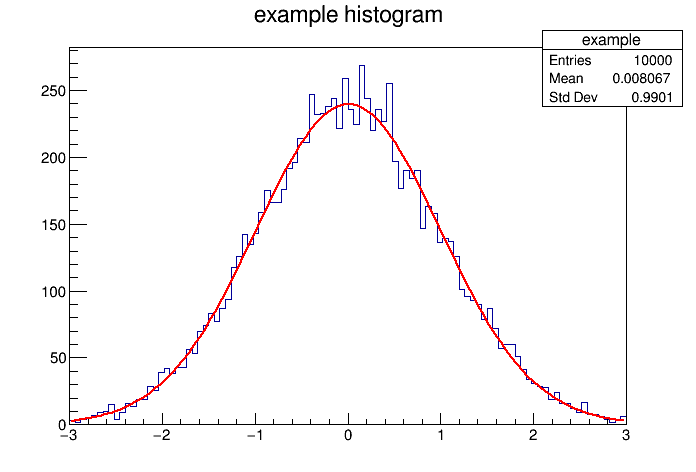

In [1]:
from ROOT import TH1D, TCanvas
my_canvas = TCanvas()
example = TH1D("example","example histogram",100,-3,3)
example.FillRandom("gaus",10000)
example.Fit("gaus")
example.Draw()
my_canvas.Draw()
my_canvas.SaveSource("exampleHistogram.C")

In [2]:
from ROOT import TFile, gROOT
myFile = TFile("experiment.root")
tree1 = gROOT.FindObject("tree1")



In [3]:
tree1.Print()

******************************************************************************
*Tree    :tree1     : Reconstruction ntuple                                  *
*Entries :   100000 : Total =         2810761 bytes  File  Size =    2171135 *
*        :          : Tree compression factor =   1.30                       *
******************************************************************************
*Br    0 :event     : event/I                                                *
*Entries :   100000 : Total  Size=     401519 bytes  File Size  =     134514 *
*Baskets :       12 : Basket Size=      32000 bytes  Compression=   2.85     *
*............................................................................*
*Br    1 :ebeam     : ebeam/F                                                *
*Entries :   100000 : Total  Size=     401519 bytes  File Size  =     260330 *
*Baskets :       12 : Basket Size=      32000 bytes  Compression=   1.47     *
*...................................................

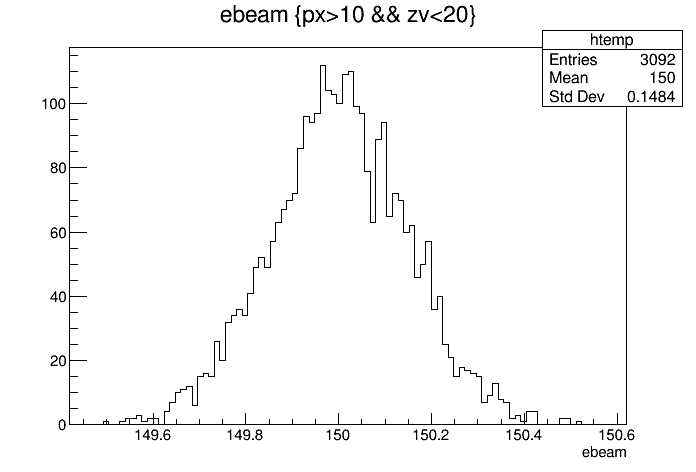

In [4]:
tree1.Draw("ebeam","px>10 && zv<20")
my_canvas.Draw()

In [5]:
%less Analyze.py

In [7]:
%jsroot on
from ROOT import TFile, gDirectory
# You probably also want to import TH1D and TCanvas,
# unless you're not making any histograms.
from ROOT import TH1D, TCanvas

# Open the file. Note that the name of your file outside this class
# will probably NOT be experiment.root.

myfile = TFile( 'experiment.root' )

# Retrieve the n-tuple of interest. In this case, the n-tuple's name is
# "tree1". You may have to use the TBrowser to find the name of the
# n-tuple that someone gives you.
mychain = gDirectory.Get( 'tree1' )
entries = mychain.GetEntriesFast()

### The Set-up code goes here.
###
chi2Hist = TH1D("chi2","Histogram of Chi2",100,0,20)
chi2Hist.GetXaxis().SetTitle("chi2")
chi2Hist.GetYaxis().SetTitle("number of events")
ebeamHist = TH1D("ebeamHist","Histogram of ebeam",100,140,160)
ebeamHist.GetXaxis().SetTitle("ebeam")
ebeamHist.GetYaxis().SetTitle("number of events")

for jentry in range( entries ):
   # Get the next tree in the chain and verify.
   ientry = mychain.LoadTree( jentry )
   if ientry < 0:
      break

   # Copy next entry into memory and verify.
   nb = mychain.GetEntry( jentry )
   if nb <= 0:
      continue

   # Use the values directly from the tree. This is an example using a
   # variable "vertex". This variables does not exist in the example
   # n-tuple experiment.root, to force you to think about what you're
   # doing.  
   # myValue = mychain.vertex 
   # myHist.Fill(myValue)

   ### The Loop code goes here.
   ###
   chi2 = mychain.chi2
   chi2Hist.Fill(chi2)
   ebeam = mychain.ebeam
   ebeamHist.Fill(ebeam)

### The Wrap-up code goes here
###
canvas = TCanvas()   
chi2Hist.Draw("E")
canvas.Draw()
canvas2 = TCanvas()   
ebeamHist.Draw("E")
canvas2.Draw()


In [8]:
tree1.Draw("sqrt(px*px + py*py)")
canvas2.Draw()

In [11]:
# %load Analyze.py
from ROOT import TFile, gDirectory
# You probably also want to import TH1D and TCanvas,
# unless you're not making any histograms.
from ROOT import TH1D, TCanvas

# Open the file. Note that the name of your file outside this class
# will probably NOT be experiment.root.

myfile = TFile( 'experiment.root' )

# Retrieve the n-tuple of interest. In this case, the n-tuple's name is
# "tree1". You may have to use the TBrowser to find the name of the
# n-tuple that someone gives you.
mychain = gDirectory.Get( 'tree1' )
entries = mychain.GetEntriesFast()

### The Set-up code goes here.
###
pzCount = 0

for jentry in range( entries ):
   # Get the next tree in the chain and verify.
   ientry = mychain.LoadTree( jentry )
   if ientry < 0:
      break

   # Copy next entry into memory and verify.
   nb = mychain.GetEntry( jentry )
   if nb <= 0:
      continue

   # Use the values directly from the tree. This is an example using a
   # variable "vertex". This variables does not exist in the example
   # n-tuple experiment.root, to force you to think about what you're
   # doing.  
   # myValue = mychain.vertex 
   # myHist.Fill(myValue)

   ### The Loop code goes here.
   ###
   pz = mychain.pz
   if ( pz < 145 ):
      pzCount = pzCount + 1

### The Wrap-up code goes here
###
print ("The number of events with pz < 145 is", pzCount)


The number of events with pz < 145 is 14962


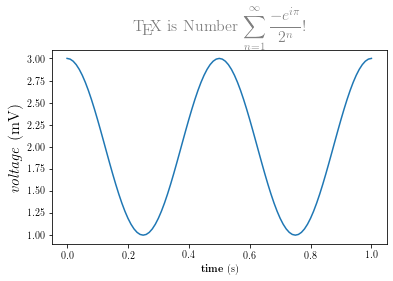

In [12]:
"""
Demo of TeX rendering.

You can use TeX to render all of your matplotlib text if the rc
parameter text.usetex is set.  This works currently on the agg and ps
backends, and requires that you have tex and the other dependencies
described at http://matplotlib.org/users/usetex.html
properly installed on your system.  The first time you run a script
you will see a lot of output from tex and associated tools.  The next
time, the run may be silent, as a lot of the information is cached in
~/.tex.cache

"""
import numpy as np
import matplotlib.pyplot as plt


# Example data
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(4 * np.pi * t) + 2

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t, s)

plt.xlabel(r'\textbf{time} (s)')
plt.ylabel(r'\textit{voltage} (mV)',fontsize=16)
plt.title(r"\TeX\ is Number "
          r"$\displaystyle\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!",
          fontsize=16, color='gray')
# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)

plt.savefig('tex_demo')
plt.show()

In [13]:
# %load ~seligman/root-class/AnalyzeExercise5.py
from ROOT import TFile, gDirectory, TH2D, TCanvas

# Open the file. Note that the name of your file outside this class
# will probably NOT be experiment.root.

myfile = TFile( 'experiment.root' )

# Retrieve the n-tuple of interest. In this case, the n-tuple's name is
# "tree1". You may have to use the TBrowser to find the name of the
# n-tuple that someone gives you.
mychain = gDirectory.Get( 'tree1' )
entries = mychain.GetEntriesFast()

### The Set-up code goes here.
# Create a 2D histogram
myHist = TH2D("hist2D","chi2 vs ebeam",100,0,20,100,149,151)
myHist.GetXaxis().SetTitle("chi2")
myHist.GetYaxis().SetTitle("ebeam [GeV]")
###

for jentry in range( entries ):
   # Get the next tree in the chain and verify.
   ientry = mychain.LoadTree( jentry )
   if ientry < 0:
      break

   # Copy next entry into memory and verify.
   nb = mychain.GetEntry( jentry )
   if nb <= 0:
      continue

   # Use the values directly from the tree. This is an example using a
   # variable "vertex". This variables does not exist in the example
   # n-tuple experiment.root, to force you to think about what you're
   # doing.  
   # myValue = mychain.vertex 
   # myHist.Fill(myValue)

   ### The Loop code goes here.
   chi2 = mychain.chi2
   ebeam = mychain.ebeam
   myHist.Fill(chi2,ebeam)
   ###
   
### The Wrap-up code goes here
myCanvas = TCanvas()
myHist.Draw()
myCanvas.Draw()
###


In [14]:
myCanvas.SaveSource("testsave.C")

Info in <TCanvas::SaveSource>: C++ Macro file: testsave.C has been generated


In [15]:
2 + 3

5

In [16]:
import ROOT

In [17]:
rebinning = TH1D("rebinning","testing rebinning",50,-3,3)

In [18]:
rebinning.SetCanExtend(ROOT.TH1.kXaxis) 

0

In [19]:
rebinning.Sumw2() 

In [20]:
%%writefile test.txt

UsageError: %%writefile is a cell magic, but the cell body is empty.


In [21]:
%%timeit
2+3

13.6 ns ± 0.0109 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [22]:
%%sh
date=`date`
echo $date

Thu May 26 11:34:30 EDT 2022


# 2017 Analysis Project
*Energy*, **time**, and `momentum` are all variables in this n-tuple. 


In [23]:
%%latex
\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}


<IPython.core.display.Latex object>

In [24]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %jsmva  %jsroot  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cpp  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%

In [26]:
from ROOT import TMath
print (TMath.Sqrt(2))

1.4142135623730951


In [27]:
import numpy as np

In [37]:
dest = np.zeros((20))
dest

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [35]:
limit=11
result = 13*np.arange(0,limit)
result

array([  0,  13,  26,  39,  52,  65,  78,  91, 104, 117, 130])

In [41]:
dest[0:limit] += 13*np.arange(0,limit)
dest

array([  0.,  26.,  52.,  78., 104., 130., 156., 182., 208., 234., 260.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])